In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, make_scorer, f1_score, matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV,  GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [5]:
X = pd.read_csv("emb/sc_ppi_emb_d32_e1_l120_w20_k10_p1.emb.csv") # 2nd in emb
X.drop(columns=X.columns[0], axis=1, inplace=True)
X.head()

,Emb_1,Emb_2,Emb_3,Emb_4,Emb_5,Emb_6,Emb_7,Emb_8,Emb_9,Emb_10,...,Emb_24,Emb_25,Emb_26,Emb_27,Emb_28,Emb_29,Emb_30,Emb_31,Emb_32,Unnamed: 33
0,0.133562,0.075951,-0.027639,0.198401,-0.064144,-0.165957,-0.111135,-0.005903,0.188306,-0.223805,...,-0.303960,0.222829,0.167499,-0.520448,3.02464,-0.006262,-0.241366,-0.028951,0.201400,NaN
1,0.010879,0.029670,-0.019173,0.046828,0.074498,-0.063330,0.019113,-0.043083,0.035660,-0.047719,...,0.063169,0.112339,-0.215539,-0.294491,3.24762,0.074741,-0.046354,-0.058968,0.140154,NaN
2,-0.019119,0.046482,0.077684,-0.021208,-0.040450,-0.119492,0.006274,-0.199189,-0.003819,0.049080,...,-0.136410,0.004021,0.019214,-0.120304,3.23350,0.108201,-0.083698,-0.055260,-0.035423,NaN
3,-0.048164,0.131044,0.030235,-0.108727,-0.057720,-0.001844,-0.015160,0.026342,0.103729,0.032753,...,-0.141163,0.154178,0.296129,-0.326025,3.14568,-0.107862,-0.084638,0.040123,-0.136966,NaN
4,-0.191108,-0.035626,-0.004057,-0.075384,0.342637,-0.061147,0.187003,0.315424,-0.195804,-0.198645,...,-0.167942,-0.351001,0.065641,-0.305100,3.27267,-0.090604,0.425302,0.260580,-0.002931,NaN


In [6]:
y = pd.read_csv("emb/sc_ppi_emb_d32_e1_l120_w20_k10_p1.emb_out.csv")
y.head()

,Essentiality
0,0
1,1
2,0
3,1
4,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [40]:
param_grid = {
         'max_depth': [5, 6, 7],
         'learning_rate': [0.1, 0.15, 0.2],
         'min_child_weight' : [1, 3, 5],
         'gamma': [0.1, 0.2, 0.3],
         'reg_lambda': [10.0, 20.0, 30.0],
         'scale_pos_weight': [1]
    }

clf = GridSearchCV(estimator = xgb.XGBClassifier(),
                            param_grid = param_grid,
                            scoring = 'roc_auc',
                            verbose = 2,
                            n_jobs = 10,
                            cv = 4)



In [41]:
clf.fit(X_train,
        y_train,
        early_stopping_rounds=10,
        eval_metric='auc',
        eval_set=[(X_test, y_test)],
        verbose=True)


Fitting 4 folds for each of 243 candidates, totalling 972 fits
[0]	validation_0-auc:0.76510
[1]	validation_0-auc:0.78819
[2]	validation_0-auc:0.79265
[3]	validation_0-auc:0.81628
[4]	validation_0-auc:0.83018
[5]	validation_0-auc:0.84304
[6]	validation_0-auc:0.85018
[7]	validation_0-auc:0.85984
[8]	validation_0-auc:0.86649
[9]	validation_0-auc:0.87875
[10]	validation_0-auc:0.88701
[11]	validation_0-auc:0.89166


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[12]	validation_0-auc:0.89577
[13]	validation_0-auc:0.89921
[14]	validation_0-auc:0.90111
[15]	validation_0-auc:0.90349
[16]	validation_0-auc:0.90582
[17]	validation_0-auc:0.90744
[18]	validation_0-auc:0.90882
[19]	validation_0-auc:0.91074
[20]	validation_0-auc:0.91292
[21]	validation_0-auc:0.91442
[22]	validation_0-auc:0.91425
[23]	validation_0-auc:0.91694
[24]	validation_0-auc:0.91760
[25]	validation_0-auc:0.91836
[26]	validation_0-auc:0.92029
[27]	validation_0-auc:0.92120
[28]	validation_0-auc:0.92252
[29]	validation_0-auc:0.92328
[30]	validation_0-auc:0.92375
[31]	validation_0-auc:0.92494
[32]	validation_0-auc:0.92552
[33]	validation_0-auc:0.92533
[34]	validation_0-auc:0.92537
[35]	validation_0-auc:0.92575
[36]	validation_0-auc:0.92699
[37]	validation_0-auc:0.92741
[38]	validation_0-auc:0.92838
[39]	validation_0-auc:0.92861
[40]	validation_0-auc:0.92918
[41]	validation_0-auc:0.93041
[42]	validation_0-auc:0.93019
[43]	validation_0-auc:0.93048
[44]	validation_0-auc:0.93045
[45]	valid

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=10,
             param_grid={'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.1, 0.15, 0.2],
                         'max_depth': [5, 6, 7], 'min_child_weight': [1, 3, 5],
                         'reg_lambda': [10.0, 20.0, 30.0],
                         'scale_pos_weight': [1]},
             scoring='roc_auc', verbose=2)

[11:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9276387377584331
Balanced Accuracy Score: 0.7954262348663024
F1 Score: 0.7188160676532771
Matthew's Correlation Coefficient 0.6952019660576211


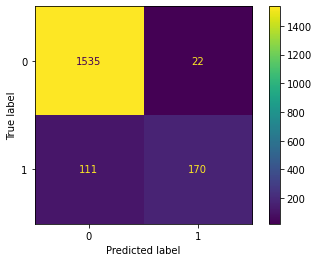

In [6]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)

xgb_clf.fit(X_train, y_train)

predictions = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

In [8]:
predictions = xgb_clf.predict(X_test)
acc = accuracy_score(y_test, predictions)
balanced_acc = balanced_accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
matt = matthews_corrcoef(y_test, predictions)

In [9]:
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))

Accuracy:  0.9276387377584331
Balanced Accuracy:  0.7954262348663024
F1 Score: 0.7188160676532771
Matthew's Correlation Coefficient 0.6952019660576211


In [12]:
score = cross_val_score(xgb_clf, X, y, cv=10)


[11:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [13]:
score

array([0.90884354, 0.93197279, 0.92653061, 0.92380952, 0.93061224,
       0.92653061, 0.92517007, 0.93469388, 0.90612245, 0.8719346 ])

In [14]:
score.mean()

0.9186220319190346

In [10]:
kf = KFold(n_splits=10)
kf


KFold(n_splits=10, random_state=None, shuffle=False)

In [25]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)
k_acc = []
k_bal_acc =[]
k_f1 = []
k_matt_corr = []


In [43]:
cross_val_score(clf, X, y)

Fitting 4 folds for each of 243 candidates, totalling 972 fits


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[14:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 4 folds for each of 243 candidates, totalling 972 fits


In [23]:
kf.split(X)

<generator object _BaseKFold.split at 0x000001A667E9F350>

X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8870748299319728
Balanced Accuracy Score: 0.8380108104301284
F1 Score: 0.7919799498746868
Matthew's Correlation Coefficient 0.7236035412406578


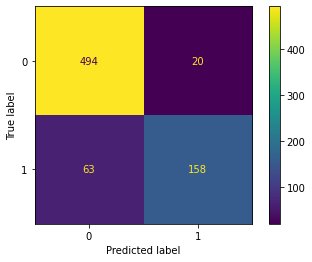



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9047619047619048
Balanced Accuracy Score: 0.8377149877149878
F1 Score: 0.787878787878788
Matthew's Correlation Coefficient 0.7366098680694475


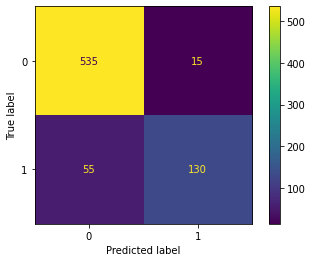



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9047619047619048
Balanced Accuracy Score: 0.8247565318117465
F1 Score: 0.7602739726027398
Matthew's Correlation Coefficient 0.7093303458736587


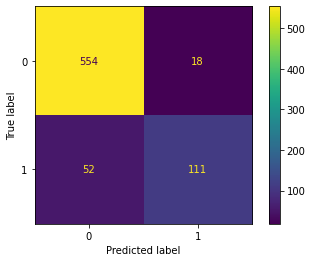



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8843537414965986
Balanced Accuracy Score: 0.7765509030846454
F1 Score: 0.6909090909090908
Matthew's Correlation Coefficient 0.6393576392094852


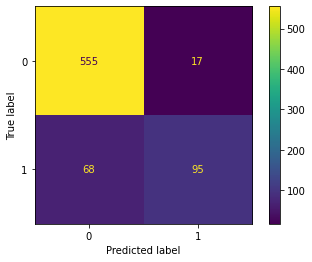



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8965986394557823
Balanced Accuracy Score: 0.7817680273518441
F1 Score: 0.6695652173913044
Matthew's Correlation Coefficient 0.6137594695303094


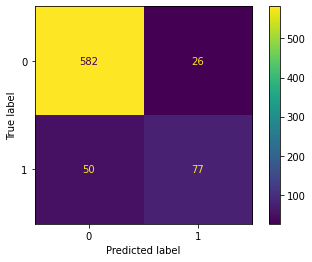



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9102040816326531
Balanced Accuracy Score: 0.7237667438520385
F1 Score: 0.6024096385542169
Matthew's Correlation Coefficient 0.5946667808894467


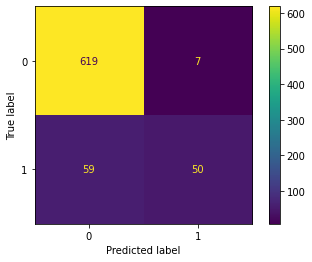



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9238095238095239
Balanced Accuracy Score: 0.6760881222629368
F1 Score: 0.4716981132075472
Matthew's Correlation Coefficient 0.45221896040008025


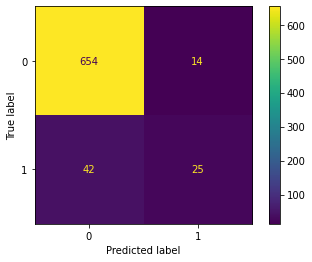



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9374149659863945
Balanced Accuracy Score: 0.5943842449260406
F1 Score: 0.303030303030303
Matthew's Correlation Coefficient 0.33925851959552017


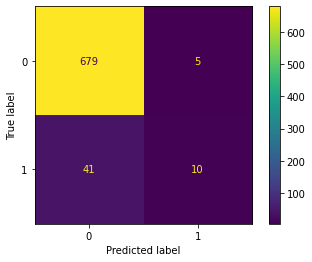



X_train (6614, 33)
X_test (735, 33)
y_train (6614, 1)
y_test (735, 1)
[13:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9687074829931973
Balanced Accuracy Score: 0.5228241693619524
F1 Score: 0.08
Matthew's Correlation Coefficient 0.08050426683921671


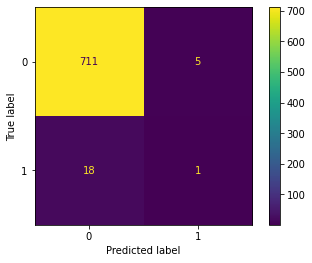



X_train (6615, 33)
X_test (734, 33)
y_train (6615, 1)
y_test (734, 1)
[13:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9700272479564033
Balanced Accuracy Score: 0.4979020979020979
F1 Score: 0.0
Matthew's Correlation Coefficient -0.010443010591088233


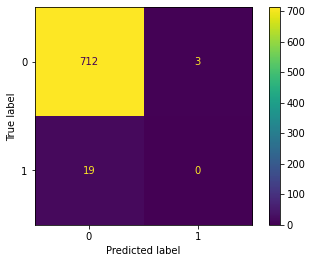

In [26]:
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)

    xgb_clf.fit(X_train, y_train)
    predictions = xgb_clf.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, predictions))
    k_acc.append(accuracy_score(y_test, predictions))
    print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
    k_bal_acc.append(balanced_accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions))
    k_f1.append(f1_score(y_test, predictions))
    print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))
    k_matt_corr.append(matthews_corrcoef(y_test, predictions))
    c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                                  display_labels=xgb_clf.classes_)
    disp.plot()
    plt.show()
    print("\n")

In [37]:
skf = StratifiedKFold(n_splits=5)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [38]:
acc = []
bal_acc =[]
f1 = []
matt_corr = []

X_train (5879, 33)
X_test (1470, 33)
y_train (5879, 1)
y_test (1470, 1)
Fitting 4 folds for each of 324 candidates, totalling 1296 fits


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[14:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 1.0
Balanced Accuracy Score: 1.0
F1 Score: 1.0
Matthew's Correlation Coefficient 1.0


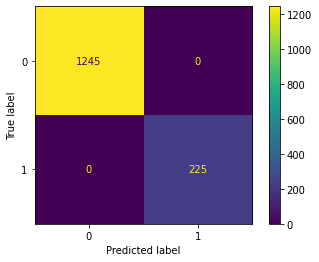



X_train (5879, 33)
X_test (1470, 33)
y_train (5879, 1)
y_test (1470, 1)
Fitting 4 folds for each of 324 candidates, totalling 1296 fits


KeyboardInterrupt: 

In [39]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)

    clf.fit(X_train, y_train)
    predictions = xgb_clf.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, predictions))
    acc.append(accuracy_score(y_test, predictions))
    print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
    bal_acc.append(balanced_accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))
    matt_corr.append(matthews_corrcoef(y_test, predictions))
    c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                                  display_labels=xgb_clf.classes_)
    disp.plot()
    plt.show()
    print("\n")

In [ ]:
acc.mean()
k_acc.mean()

[0.908843537414966,
 0.9319727891156463,
 0.926530612244898,
 0.9238095238095239,
 0.9306122448979591,
 0.926530612244898,
 0.9251700680272109,
 0.9346938775510204,
 0.9061224489795918,
 0.8719346049046321]

In [36]:
bal_acc.mean()
k_bal_acc.mean()

AttributeError: 'list' object has no attribute 'mean'

In [ ]:
f1.mean()
k_f1.mean()

[0.7022222222222223,
 0.7727272727272728,
 0.7452830188679247,
 0.7407407407407408,
 0.7559808612440192,
 0.7127659574468086,
 0.7120418848167539,
 0.7333333333333334,
 0.5605095541401274,
 0.2878787878787879]